<a href="https://colab.research.google.com/github/EyuaelB/huletshi_shilmat/blob/master/shilmat_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Preparing ሁለት ሺ ሓበሻ ሽልማት Dataset

ሁለት ሺ ሓበሻ የባህል ምግባ አዳራሽ የባህል ሙዚቃ ባንድ ሽልማት ትንበያ

In [2]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('shilmat_data2.csv')
df

,Date,Day,Income
0,2022-9-12,monday,160
1,2022-9-13,tuesday,150
2,2022-9-14,wednesday,0
3,2022-9-15,thursday,250
4,2022-9-16,friday,290
5,2022-9-17,saturday,440
6,2022-9-18,sunday,350
7,2022-9-19,monday,0
8,2022-9-20,tuesday,700
9,2022-9-21,wednesday,0


In [6]:
df['Date'] = pd.to_datetime(df.Date)
df=df.drop(columns=['Day'],axis=1) #drop the day column a it is there for recording purpose only , the date is sufficient
df['DayOfTheWeek'] = df.Date.dt.day_of_week
df['DayName'] = df.Date.dt.day_name()
df['Month'] = df.Date.dt.month
df['MonthName'] =df.Date.dt.month_name()
df['DayOfTheMonth'] = df.Date.dt.day
df['Year'] = df.Date.dt.year


df

,Date,Income,DayOfTheWeek,DayName,Month,MonthName,DayOfTheMonth,Year
0,2022-09-12,160,0,Monday,9,September,12,2022
1,2022-09-13,150,1,Tuesday,9,September,13,2022
2,2022-09-14,0,2,Wednesday,9,September,14,2022
3,2022-09-15,250,3,Thursday,9,September,15,2022
4,2022-09-16,290,4,Friday,9,September,16,2022
5,2022-09-17,440,5,Saturday,9,September,17,2022
6,2022-09-18,350,6,Sunday,9,September,18,2022
7,2022-09-19,0,0,Monday,9,September,19,2022
8,2022-09-20,700,1,Tuesday,9,September,20,2022
9,2022-09-21,0,2,Wednesday,9,September,21,2022


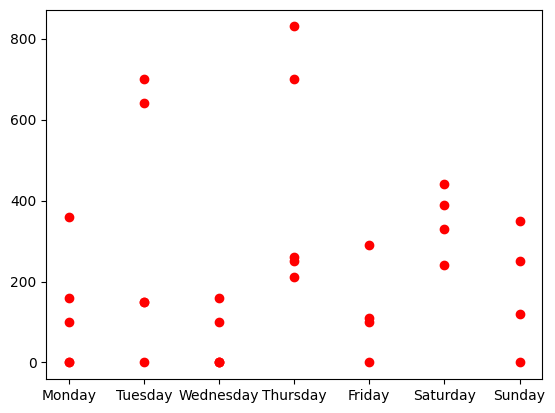

In [9]:
plt.scatter(df['DayName'].values,df['Income'].values,c="red")
plt.show()

The graph shows that most day which are fasting-free in Ethiopian specifically Orthodox Christians(Monday,Tuesday.Thursday,Saturday,Sunday), Income is good. and in times of events such as weddings, Work-parties etc... Income is exceptionally good.(tuesday: 700, thursday: 830, tuesday: 640, thursday: 700)

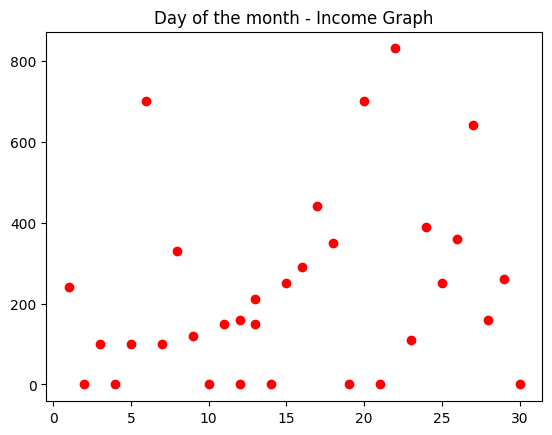

In [11]:
plt.scatter(df['DayOfTheMonth'].values,df['Income'].values,c="red")
plt.title("Day of the month - Income Graph")
plt.show()

From of the graph , most time we gravitate to a 400 br income, income: 330, 350, 390, 360 are what a normal good day is at huletshi habesha for the band 

In the "Day of the month - income" graph we can analyze that as the month progresses towards the last half of the month income increases. i have o definite explanation for this!

In [5]:
features = ['DayOfTheWeek','DayOfTheMonth','Month'] #removed the year column from the features b/c all the data is from the same year 2022
X = df[features].values
y = df['Income']


In [10]:
X

array([[ 0, 12,  9],
       [ 1, 13,  9],
       [ 2, 14,  9],
       [ 3, 15,  9],
       [ 4, 16,  9],
       [ 5, 17,  9],
       [ 6, 18,  9],
       [ 0, 19,  9],
       [ 1, 20,  9],
       [ 2, 21,  9],
       [ 3, 22,  9],
       [ 4, 23,  9],
       [ 5, 24,  9],
       [ 6, 25,  9],
       [ 0, 26,  9],
       [ 1, 27,  9],
       [ 2, 28,  9],
       [ 3, 29,  9],
       [ 4, 30,  9],
       [ 5,  1, 10],
       [ 6,  2, 10],
       [ 0,  3, 10],
       [ 1,  4, 10],
       [ 2,  5, 10],
       [ 3,  6, 10],
       [ 4,  7, 10],
       [ 5,  8, 10],
       [ 6,  9, 10],
       [ 0, 10, 10],
       [ 1, 11, 10],
       [ 2, 12, 10]], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Model Training(ልምምድ እና ማስተማር)

## Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

237.75288641780986

In [6]:
from sklearn.ensemble import RandomForestRegressor

max_depth = [None,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
params={'max_depth': max_depth}
regressor = RandomForestRegressor(random_state=0)
gs  = GridSearchCV(regressor,params,scoring='neg_mean_squared_error')
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                       22, 24, 26, 28, 30]},
             scoring='neg_mean_squared_error')

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

best_model = gs.best_estimator_
y_pred =best_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

183.84497106680985

In [10]:
val = np.array([[2,12,10]])
print(best_model.predict(val))

[117.05301073]


In [36]:
import pickle
data = {'model': best_model}

with open('current_model_30rec_gcvRForest.pkl','wb') as file:
    pickle.dump(data,file)
    

## XGB Regressor

In [29]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=33,learning_rate=0.01)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=33, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
error


154.86896509090127

In [31]:
val = np.array([[4,14,10]])

print(model.predict(val))

[33.372528]


In [15]:
import pickle
data = {'model': model}

with open('xgmodel31.pkl','wb') as file:
    pickle.dump(data,file)

## Extra Tree Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ext_model = ExtraTreesRegressor(n_estimators=30,random_state=0)
ext_model.fit(X_train,y_train)

In [61]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = ext_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

116.24365488742728

In [69]:
import pickle
data = {'model': ext_model}

with open('ext_model32.pkl','wb') as file:
    pickle.dump(data,file)